In [1]:
using Percolation, PyPlot

# percolation

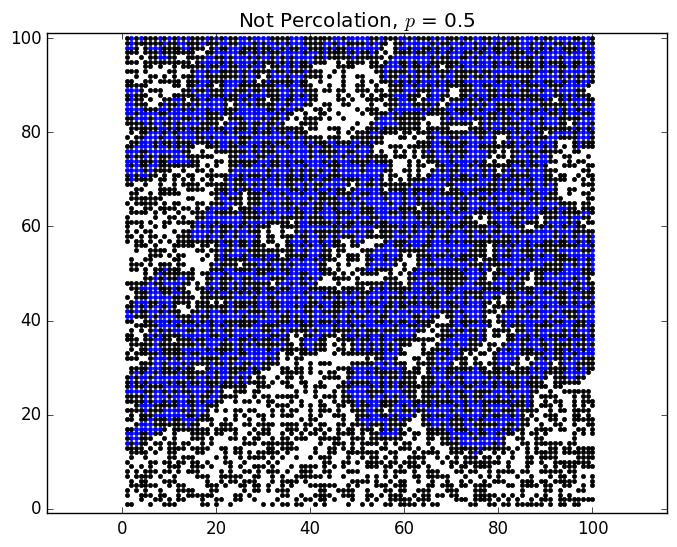

4-element Array{Int64,1}:
  -1
 101
  -1
 101

In [2]:
N = 100
p = 0.5
site = trinn(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

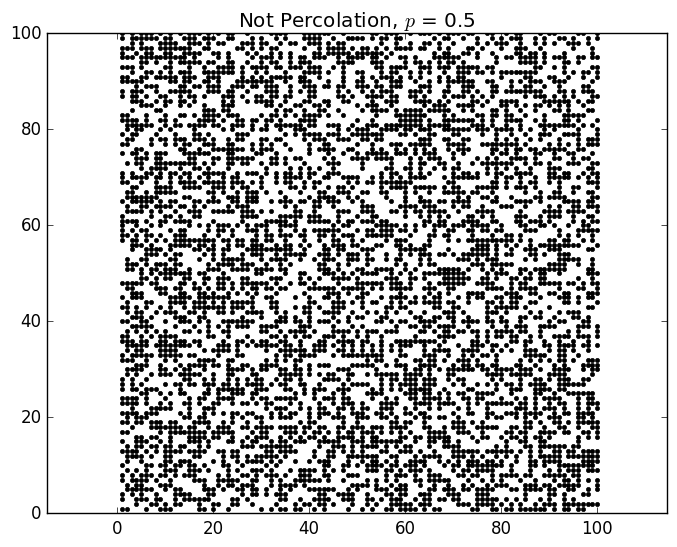

In [3]:
percolationplot(site, waterplot=false)

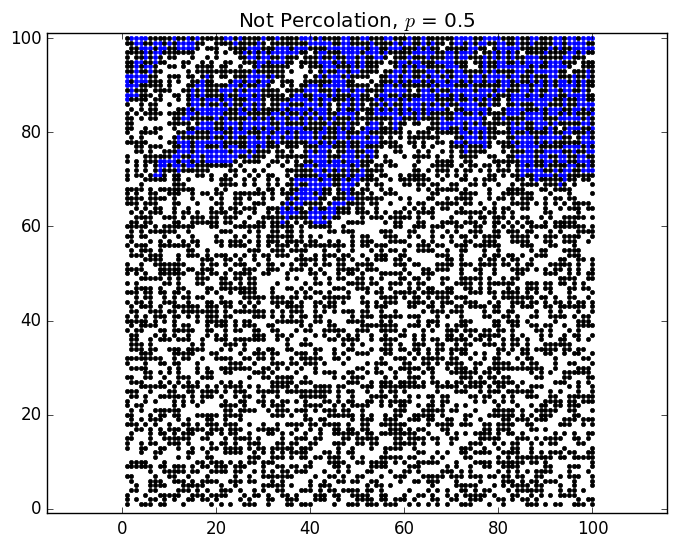

4-element Array{Int64,1}:
  -1
 101
  -1
 101

In [4]:
N = 100
p = 0.5
site = trinnrec(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

# cluster

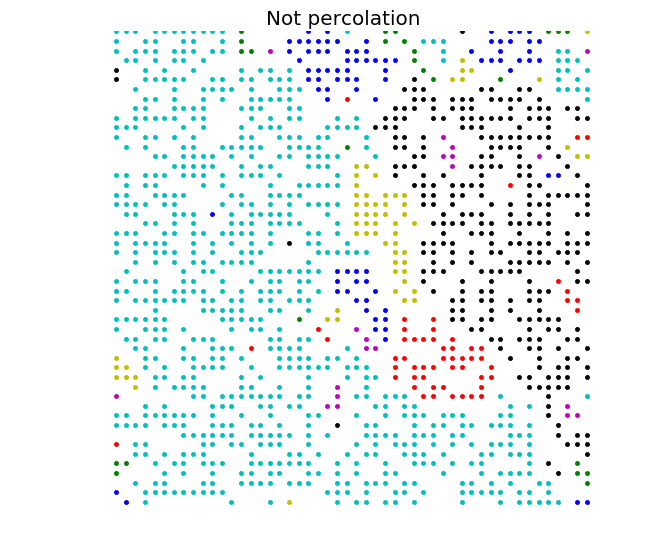

  0.378919 seconds (243.84 k allocations: 19.230 MB, 1.94% gc time)


In [5]:
site = trinn(50,0.5)
@time cluster(site)
clusterplot(site)

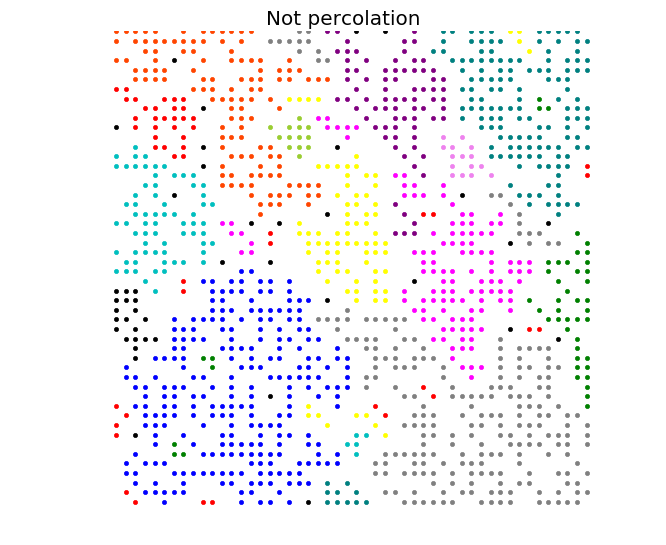

  0.005362 seconds (19.97 k allocations: 3.726 MB)


In [13]:
site = trinn(50,0.5)
@time cluster(site)
clusterplotsize(site)

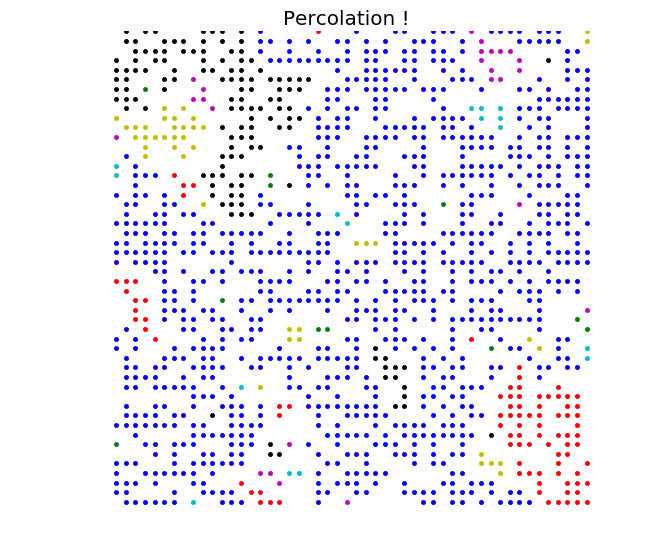

  0.161039 seconds (93.17 k allocations: 10.880 MB)


In [6]:
site = trinnrec(50,0.5)
@time cluster(site)
clusterplot(site)

# Order parameter

## triangular nearest neighbor

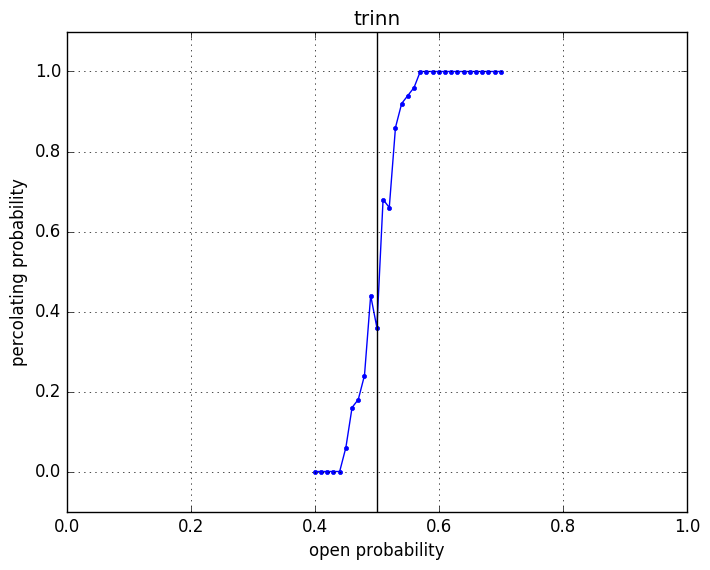

  0.727933 seconds (9.85 M allocations: 943.106 MB, 13.57% gc time)


In [7]:
# trinn
plist = collect(0.4:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinn(N, plist[i])
        hit[i] += percolation(tri)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

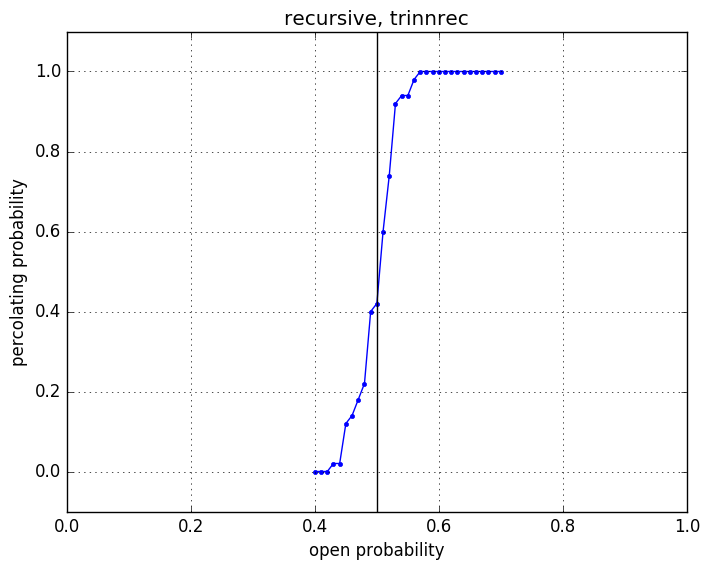

  0.145817 seconds (37.27 k allocations: 102.009 MB, 7.40% gc time)


In [8]:
# recursive, percolation
plist = collect(0.4:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinnrec(N, plist[i])
        hit[i] += percolation(tri)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("recursive, trinnrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

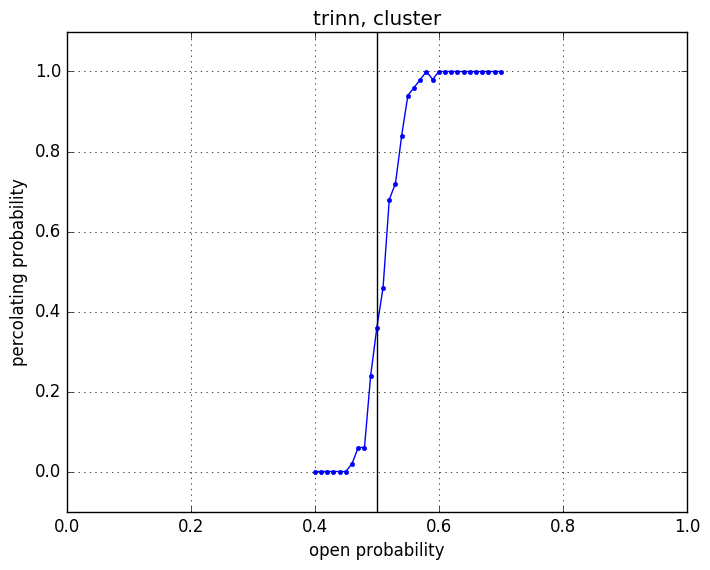

 17.330129 seconds (40.14 M allocations: 49.034 GB, 23.17% gc time)


In [9]:
# cluster
plist = collect(0.4:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinn(N, plist[i])
        cluster(tri)
        hit[i] += tri.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("trinn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

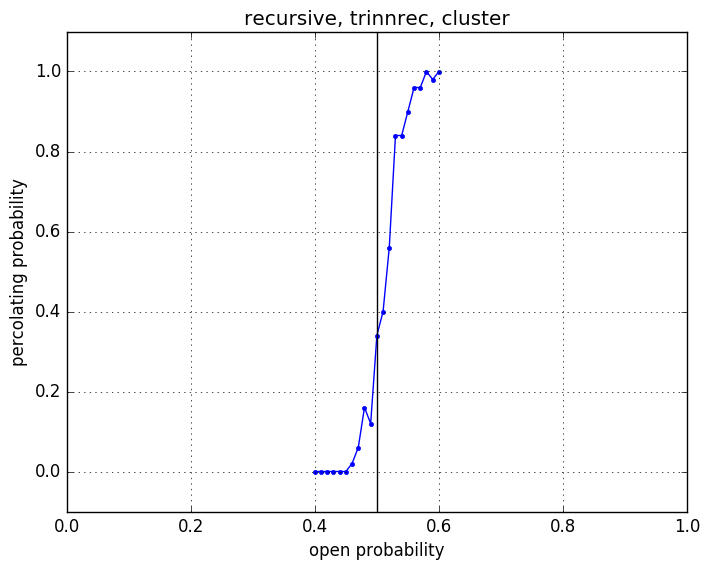

  2.726909 seconds (1.37 M allocations: 6.314 GB, 15.79% gc time)


In [10]:
# recursive, cluster
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinnrec(N, plist[i])
        cluster(tri)
        hit[i] += tri.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("recursive, trinnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);